In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train=pd.read_csv("HousePriceTrain.csv")
train

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [6]:
test=pd.read_csv("HousePriceTest.csv")
test

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000
...,...,...,...,...,...,...,...,...,...,...,...
68715,Dealer,0,1,2,BHK,856.555505,1,1,"Thane West,Maharashtra",19.180000,72.963330
68716,Dealer,0,1,3,BHK,2304.147465,1,1,"Sector-66A Mohali,Mohali",30.661104,76.746082
68717,Dealer,1,1,1,BHK,33362.792750,0,0,"Balkum,Maharashtra",19.222101,72.988231
68718,Dealer,0,0,2,BHK,1173.708920,1,1,"Hadapsar,Pune",18.496670,73.941670


In [7]:
#exploration of training data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [9]:
train[["CITY", "STATE"]] = train["ADDRESS"].str.split(",", n=1, expand=True)
test[["CITY", "STATE"]] = test["ADDRESS"].str.split(",", n=1, expand=True)

In [12]:
test = test.drop(columns=["ADDRESS"])

In [14]:
test

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,CITY,STATE
0,Owner,0,0,1,BHK,545.171340,1,1,21.262000,73.047700,Kamrej,Surat
1,Dealer,1,1,2,BHK,800.000000,0,0,18.966114,73.148278,Panvel,Lalitpur
2,Dealer,0,0,2,BHK,1257.096513,1,1,22.592200,88.484911,New Town,Kolkata
3,Dealer,0,0,3,BHK,1400.329489,1,1,26.988300,75.584600,Kalwar Road,Jaipur
4,Owner,0,0,1,BHK,430.477830,1,1,22.700000,72.870000,Mai Mandir,Nadiad
...,...,...,...,...,...,...,...,...,...,...,...,...
68715,Dealer,0,1,2,BHK,856.555505,1,1,19.180000,72.963330,Thane West,Maharashtra
68716,Dealer,0,1,3,BHK,2304.147465,1,1,30.661104,76.746082,Sector-66A Mohali,Mohali
68717,Dealer,1,1,1,BHK,33362.792750,0,0,19.222101,72.988231,Balkum,Maharashtra
68718,Dealer,0,0,2,BHK,1173.708920,1,1,18.496670,73.941670,Hadapsar,Pune


In [19]:
test.drop(columns=["CITY",'STATE'],inplace=True)
train.drop(columns=["CITY",'STATE'],inplace=True)

In [21]:
test

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,22.700000,72.870000
...,...,...,...,...,...,...,...,...,...,...
68715,Dealer,0,1,2,BHK,856.555505,1,1,19.180000,72.963330
68716,Dealer,0,1,3,BHK,2304.147465,1,1,30.661104,76.746082
68717,Dealer,1,1,1,BHK,33362.792750,0,0,19.222101,72.988231
68718,Dealer,0,0,2,BHK,1173.708920,1,1,18.496670,73.941670


array([[<AxesSubplot:title={'center':'UNDER_CONSTRUCTION'}>,
        <AxesSubplot:title={'center':'RERA'}>,
        <AxesSubplot:title={'center':'BHK_NO.'}>,
        <AxesSubplot:title={'center':'SQUARE_FT'}>],
       [<AxesSubplot:title={'center':'READY_TO_MOVE'}>,
        <AxesSubplot:title={'center':'RESALE'}>,
        <AxesSubplot:title={'center':'LONGITUDE'}>,
        <AxesSubplot:title={'center':'LATITUDE'}>],
       [<AxesSubplot:title={'center':'TARGET(PRICE_IN_LACS)'}>,
        <AxesSubplot:title={'center':'POSTED_BY_Builder'}>,
        <AxesSubplot:title={'center':'POSTED_BY_Dealer'}>,
        <AxesSubplot:title={'center':'POSTED_BY_Owner'}>],
       [<AxesSubplot:title={'center':'BHK'}>,
        <AxesSubplot:title={'center':'RK'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

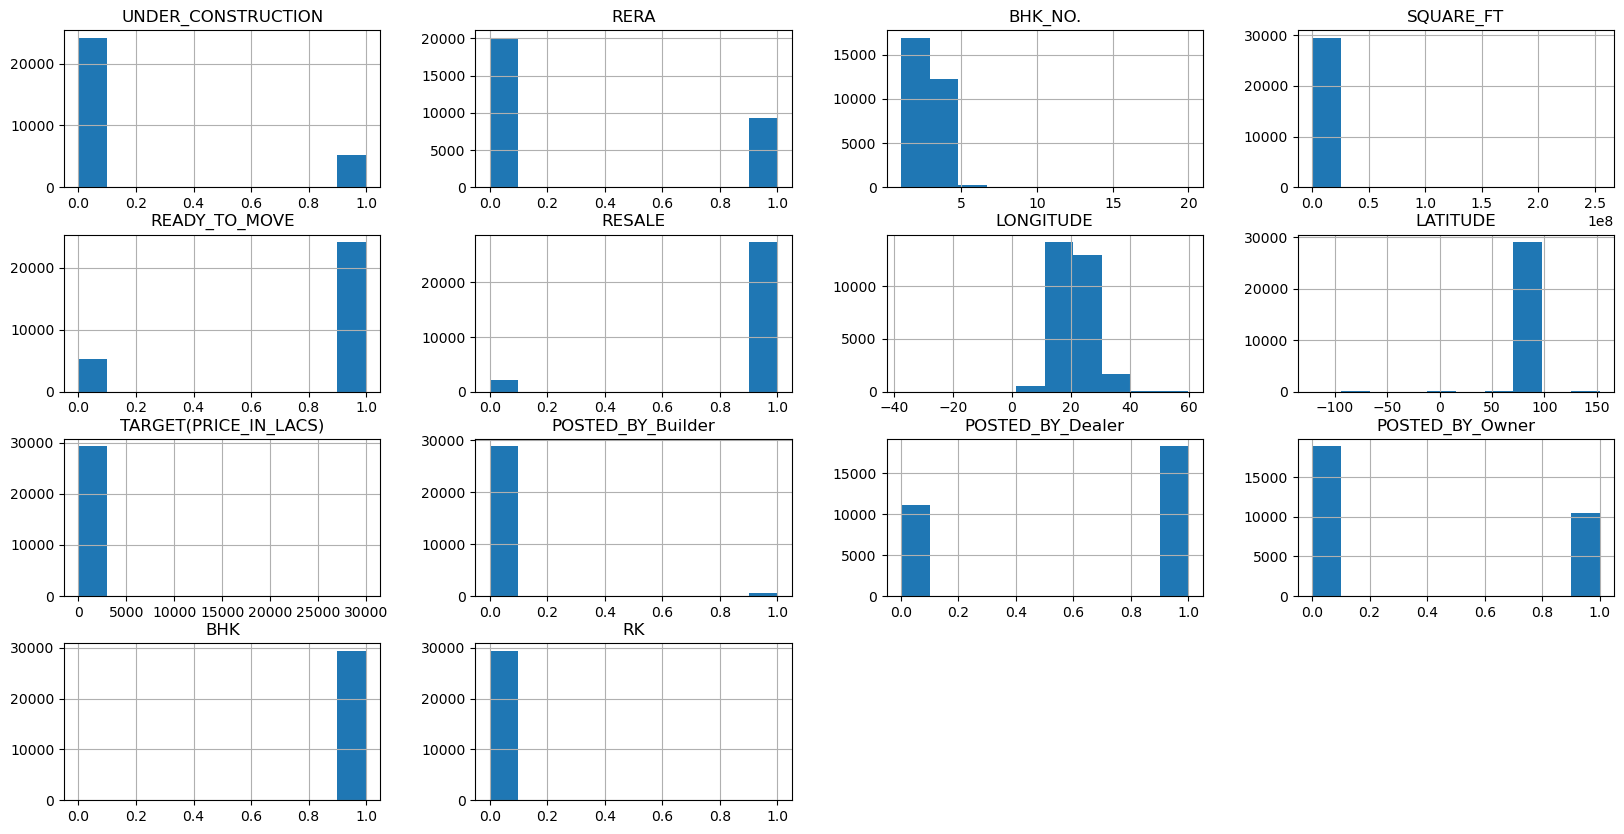

In [31]:
train.hist(figsize=(20,10))

<AxesSubplot:>

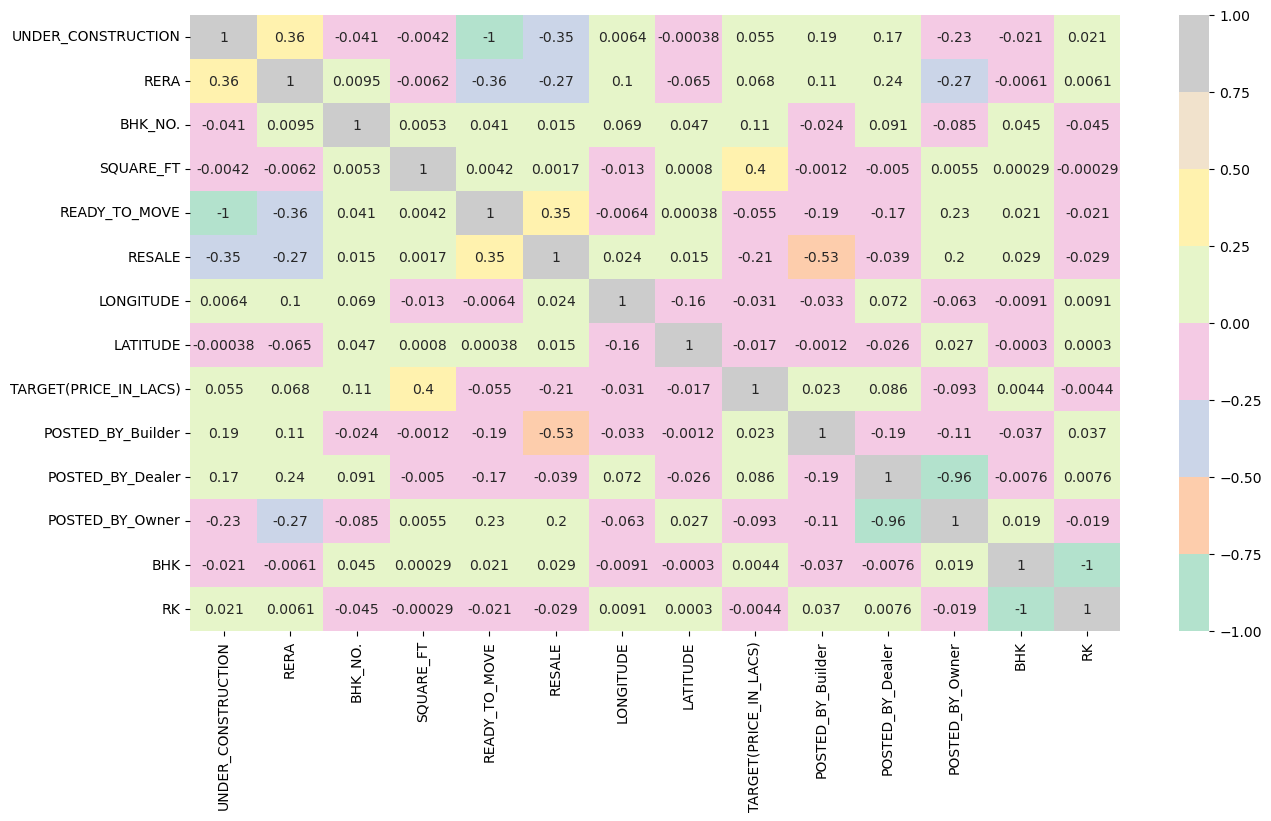

In [37]:
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(),annot=True,cmap="Pastel2")

In [23]:
train=pd.get_dummies(train,columns=['POSTED_BY','BHK_OR_RK'])
train

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_BHK,BHK_OR_RK_RK
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,0,0,1,1,0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,0,1,0,1,0
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,0,0,1,1,0
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,0,0,1,1,0
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0,0,3,2500.000000,1,1,27.140626,78.043277,45.0,0,0,1,1,0
29447,0,0,2,769.230769,1,1,39.945409,-86.150721,16.0,0,0,1,1,0
29448,0,0,2,1022.641509,1,1,26.928785,75.828002,27.1,0,1,0,1,0
29449,0,0,2,927.079009,1,1,12.900150,80.227910,67.0,0,0,1,1,0


In [24]:
train = train.rename(columns={'BHK_OR_RK_RK': 'RK', 'BHK_OR_RK_BHK': 'BHK'})
train

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,BHK,RK
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,0,0,1,1,0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,0,1,0,1,0
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,0,0,1,1,0
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,0,0,1,1,0
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0,0,3,2500.000000,1,1,27.140626,78.043277,45.0,0,0,1,1,0
29447,0,0,2,769.230769,1,1,39.945409,-86.150721,16.0,0,0,1,1,0
29448,0,0,2,1022.641509,1,1,26.928785,75.828002,27.1,0,1,0,1,0
29449,0,0,2,927.079009,1,1,12.900150,80.227910,67.0,0,0,1,1,0


In [25]:
test=pd.get_dummies(test,columns=['POSTED_BY','BHK_OR_RK'])
test = test.rename(columns={'BHK_OR_RK_RK': 'RK', 'BHK_OR_RK_BHK': 'BHK'})
test

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,BHK,RK
0,0,0,1,545.171340,1,1,21.262000,73.047700,0,0,1,1,0
1,1,1,2,800.000000,0,0,18.966114,73.148278,0,1,0,1,0
2,0,0,2,1257.096513,1,1,22.592200,88.484911,0,1,0,1,0
3,0,0,3,1400.329489,1,1,26.988300,75.584600,0,1,0,1,0
4,0,0,1,430.477830,1,1,22.700000,72.870000,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68715,0,1,2,856.555505,1,1,19.180000,72.963330,0,1,0,1,0
68716,0,1,3,2304.147465,1,1,30.661104,76.746082,0,1,0,1,0
68717,1,1,1,33362.792750,0,0,19.222101,72.988231,0,1,0,1,0
68718,0,0,2,1173.708920,1,1,18.496670,73.941670,0,1,0,1,0


<AxesSubplot:>

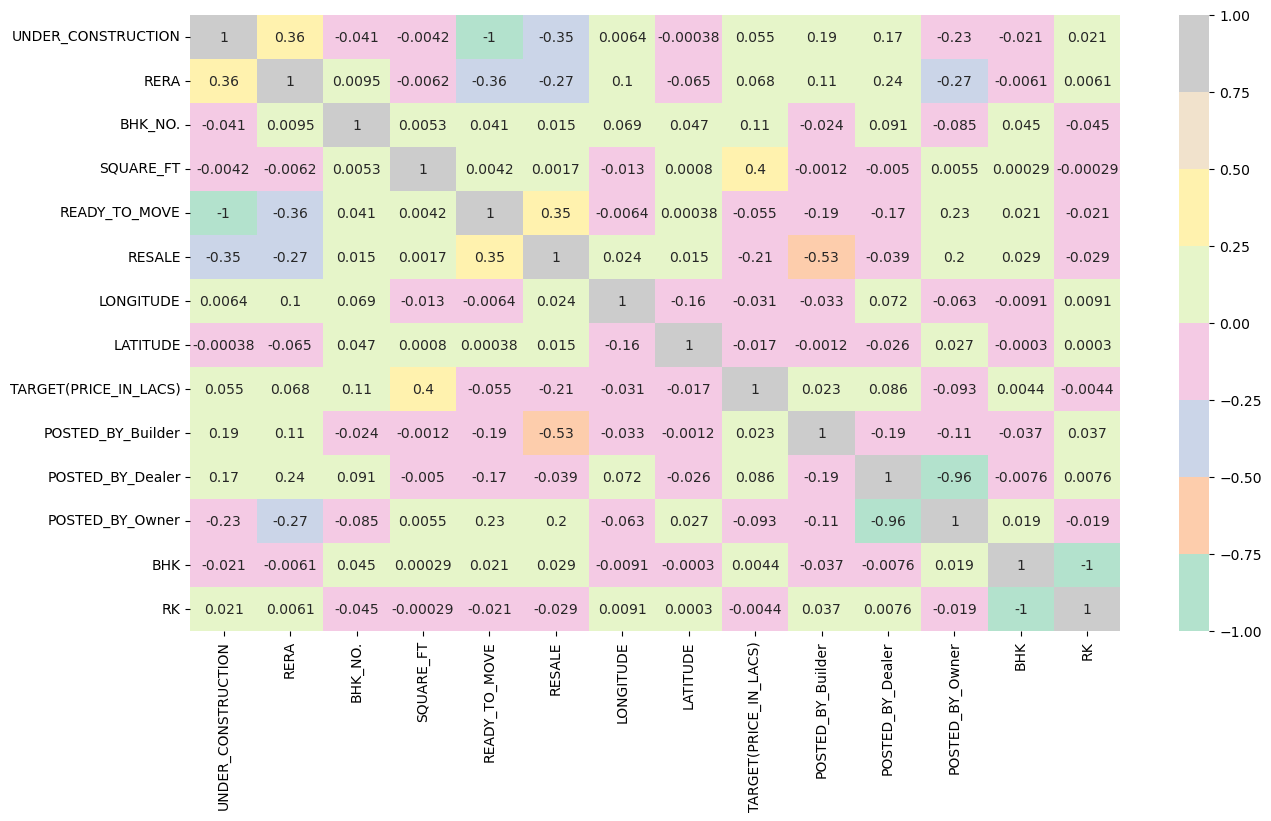

In [38]:
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(),annot=True,cmap="Pastel2")

<AxesSubplot:xlabel='LATITUDE', ylabel='LONGITUDE'>

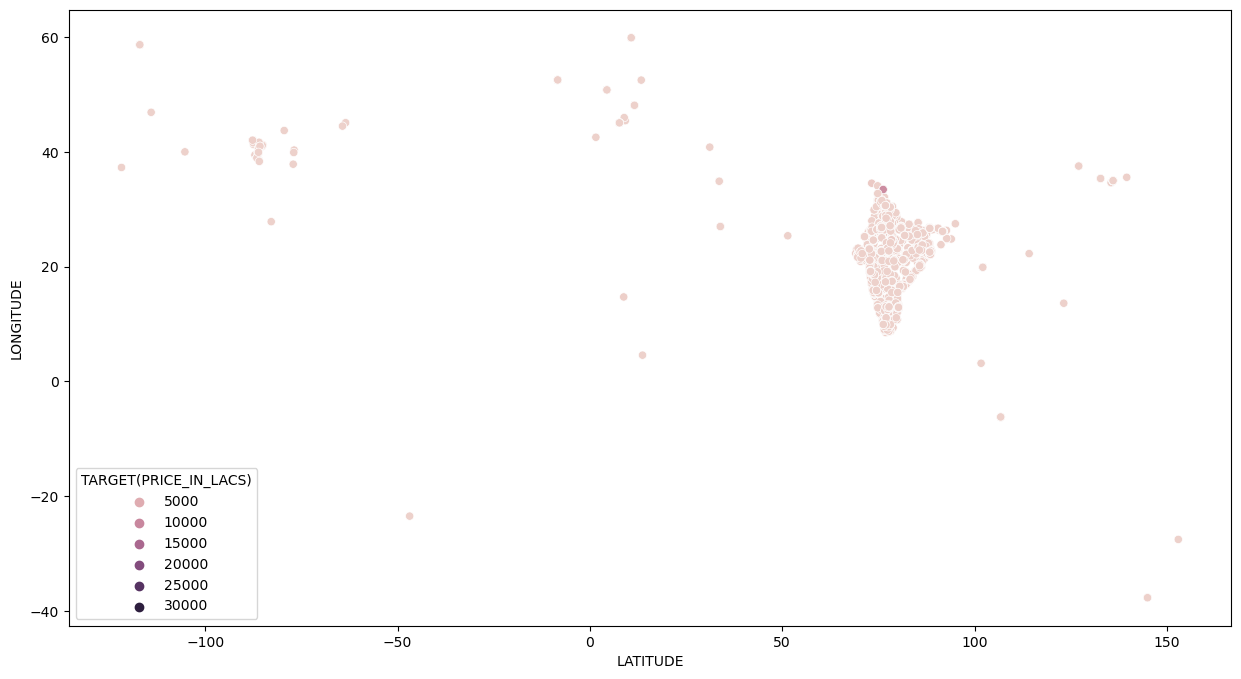

In [39]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='LATITUDE',y='LONGITUDE',data=train,hue='TARGET(PRICE_IN_LACS)')

In [43]:
x=train.drop(['TARGET(PRICE_IN_LACS)'],axis=1)
y=train['TARGET(PRICE_IN_LACS)']

from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
cols=["SQUARE_FT","LATITUDE","LONGITUDE"]

scaler.fit(x[cols])
x[cols]=scaler.transform(x[cols])
print(x)

       UNDER_CONSTRUCTION  RERA  BHK_NO.  SQUARE_FT  READY_TO_MOVE  RESALE  \
0                       0     0        2  -0.009731              1       1   
1                       0     0        2  -0.009744              1       1   
2                       0     0        2  -0.009924              1       1   
3                       0     1        2  -0.009926              1       1   
4                       1     0        2  -0.009890              0       1   
...                   ...   ...      ...        ...            ...     ...   
29446                   0     0        3  -0.009100              1       1   
29447                   0     0        2  -0.010010              1       1   
29448                   0     0        2  -0.009877              1       1   
29449                   0     0        2  -0.009927              1       1   
29450                   0     1        2  -0.009943              1       1   

       LONGITUDE   LATITUDE  POSTED_BY_Builder  POSTED_BY_Deale

In [48]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [85]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred_lr=regressor.predict(x_test)

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred_lr))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred_lr))

0.40622028012435274
131.34971298909352


In [87]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(criterion='squared_error',splitter='best')

model_fit=model.fit(x_train,y_train)
y_pred_dec=model.predict(x_test)

print(r2_score(y_test, y_pred_dec))
print(mean_absolute_error(y_test, y_pred_dec))

0.7802416521710287
38.07502033656379


In [88]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

regressor.fit(x_train, y_train)

y_pred_rf = regressor.predict(x_test)

print(r2_score(y_test, y_pred_rf))
print(mean_absolute_error(y_test, y_pred_rf))

0.7420247090102927
35.2162508279834


In [90]:
from sklearn.svm import SVR
svm_reg = SVR(kernel='rbf', C=100, gamma='auto', epsilon=0.5)
svm_reg.fit(x_train, y_train)

y_pred_svr = svm_reg.predict(x_test)

print(r2_score(y_test, y_pred_svr))
print(mean_absolute_error(y_test, y_pred_svr))

0.012300603128469811
86.92404559803028


In [91]:
from xgboost import XGBRegressor

my_model = XGBRegressor(max_depth=5, learning_rate=0.1, gamma=0.2, n_estimators=500, min_child_weight=5, subsample=0.8,colsample_bytree=0.8)
my_model.fit(x_train, y_train)
y_pred_xg = my_model.predict(x_test)

print(r2_score(y_test, y_pred_xg))
print(mean_absolute_error(y_test, y_pred_xg))

0.7250588579038655
45.168743329035614


In [108]:
test.drop(['PREDICTED_PRICE'],axis=1,inplace=True)
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
cols=["SQUARE_FT","LATITUDE","LONGITUDE"]

scaler.fit(test[cols])
test[cols]=scaler.transform(test[cols])
print(test.head())

   UNDER_CONSTRUCTION  RERA  BHK_NO.  SQUARE_FT  READY_TO_MOVE  RESALE  \
0                   0     0        1  -0.013512              1       1   
1                   1     1        2  -0.011959              0       0   
2                   0     0        2  -0.009173              1       1   
3                   0     0        3  -0.008300              1       1   
4                   0     0        1  -0.014211              1       1   

   LONGITUDE  LATITUDE  POSTED_BY_Builder  POSTED_BY_Dealer  POSTED_BY_Owner  \
0  -0.004215 -0.383302                  0                 0                1   
1  -0.375779 -0.373345                  0                 1                0   
2   0.211063  1.145002                  0                 1                0   
3   0.922522 -0.132146                  0                 1                0   
4   0.228509 -0.400895                  0                 0                1   

   BHK  RK  
0    1   0  
1    1   0  
2    1   0  
3    1   0  
4    1   

In [109]:
prediction=model.predict(test)
test["PREDICTED_PRICE"]=prediction

test

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,BHK,RK,PREDICTED_PRICE
0,0,0,1,-0.013512,1,1,-0.004215,-0.383302,0,0,1,1,0,7.5
1,1,1,2,-0.011959,0,0,-0.375779,-0.373345,0,1,0,1,0,36.9
2,0,0,2,-0.009173,1,1,0.211063,1.145002,0,1,0,1,0,92.0
3,0,0,3,-0.008300,1,1,0.922522,-0.132146,0,1,0,1,0,55.0
4,0,0,1,-0.014211,1,1,0.228509,-0.400895,0,0,1,1,0,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68715,0,1,2,-0.011614,1,1,-0.341163,-0.391655,0,1,0,1,0,130.0
68716,0,1,3,-0.002793,1,1,1.516924,-0.017158,0,1,0,1,0,66.5
68717,1,1,1,0.186476,0,0,-0.334350,-0.389190,0,1,0,1,0,6440.0
68718,0,0,2,-0.009681,1,1,-0.451753,-0.294798,0,1,0,1,0,75.0


<AxesSubplot:xlabel='LATITUDE', ylabel='LONGITUDE'>

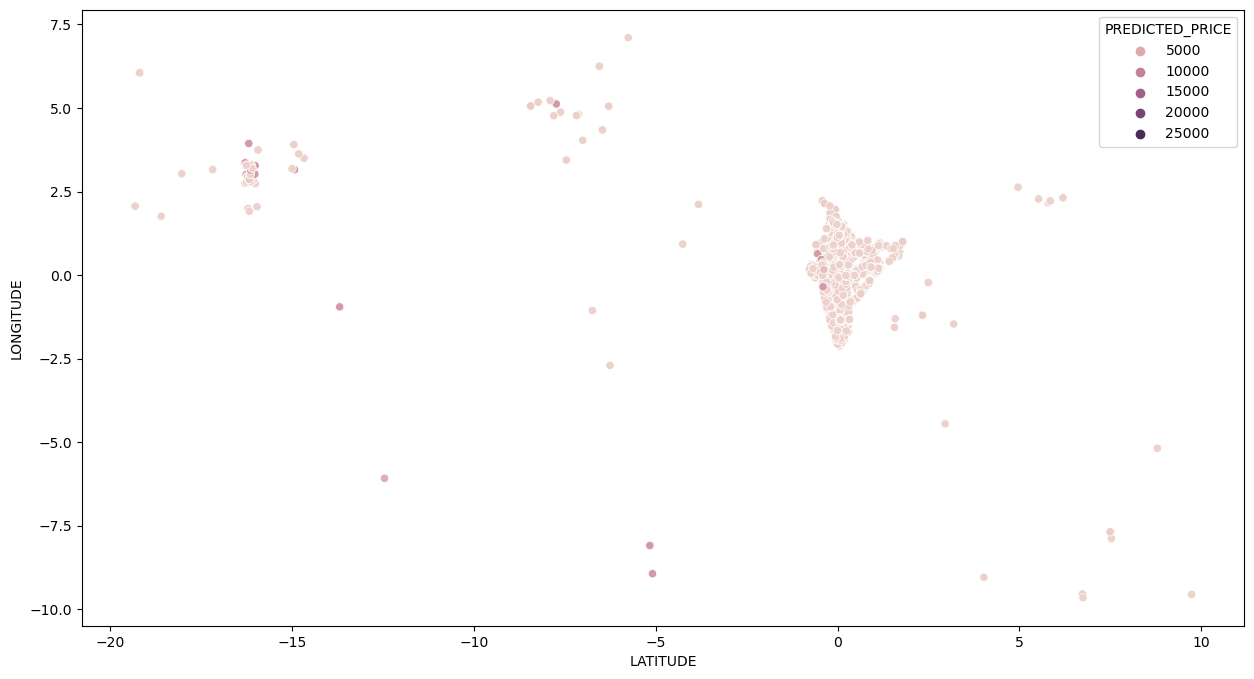

In [110]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='LATITUDE',y='LONGITUDE',data=test,hue='PREDICTED_PRICE')